<a href="https://colab.research.google.com/github/assad-ua/Quantum_Regressor/blob/main/Q_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [69]:
pip install qiskit

In [70]:
pip install 'qiskit-machine-learning[torch]'

In [71]:
from qiskit import Aer, QuantumCircuit
from qiskit.opflow import Z,I, StateFn
from qiskit.utils import QuantumInstance
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit_machine_learning.neural_networks import TwoLayerQNN, CircuitQNN
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from typing import Union
from qiskit_machine_learning.exceptions import QiskitMachineLearningError
#from qiskit_machine_learning.circuit.library import RawFeatureVector

In [72]:
quantum_instance = QuantumInstance(Aer.get_backend('qasm_simulator'), shots=1024)

In [73]:
train = pd.read_csv('BOD Dataset.csv')

In [74]:
train.head()

,Unnamed: 0,BOD,NH3-N,TN,MLSS,PH,AT_Temp,BOD_Y
0,0,170,28,44,2040,7.3,24.175,5.2
1,1,500,16,98,1660,7.5,25.360,6.0
2,2,120,20,29,2420,7.3,25.675,6.1
3,3,230,18,52,2550,7.2,28.900,5.4
4,4,120,25,39,2720,7.4,22.250,5.9


In [120]:
X = train.iloc[:,:-1]

In [122]:
X.shape()

TypeError: ignored

In [76]:
Y = train.iloc[:,7]

In [102]:
X = C.reshape((200))

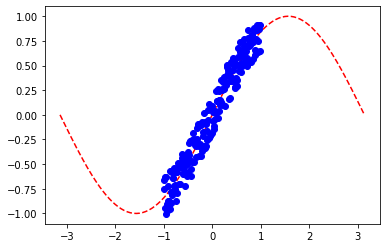

In [112]:
num_samples = 200
eps = 0.2
lb, ub = -np.pi, np.pi
X_ = np.linspace(lb, ub, num=200).reshape(200,1)
#X_= pd.concat([X_, np.zeros], axis = 1)
f = lambda x: np.sin(x)
#X = (ub - lb)*np.random.rand(num_samples, 1) + lb
y = f(X) + eps*(2*np.random.rand(num_samples)-1)

plt.plot(X_, f(X_), 'r--')
plt.plot(X, y, 'bo')
plt.show()

In [ ]:
num_samples = 20
eps = 0.2
lb, ub = -np.pi, np.pi
X_ = np.linspace(lb, ub, num=50).reshape(50, 1)
f = lambda x: np.sin(x)

X = (ub - lb)*np.random.rand(num_samples, 1) + lb
y = f(X[:,0]) + eps*(2*np.random.rand(num_samples)-1)

plt.plot(X_, f(X_), 'r--')
plt.plot(X, y, 'bo')
plt.show()

In [113]:
# construct simple feature map
param_x = Parameter('X_')
feature_map = QuantumCircuit(1, name='fm')
feature_map.ry(param_x, 0)

# construct simple ansatz
param_y = Parameter('y')
ansatz = QuantumCircuit(1, name='vf')
ansatz.ry(param_y, 0)

In [114]:
vqr = VQR(feature_map=feature_map, 
          ansatz=ansatz, 
          optimizer=L_BFGS_B(), 
          quantum_instance=quantum_instance)

In [116]:
vqr.fit(X_, y)

In [118]:
vqr.score(X_, y)

0.2962706744212217

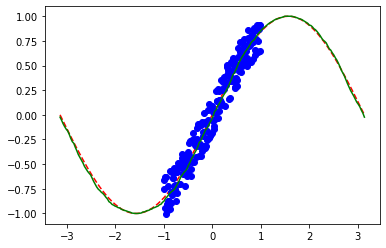

In [119]:
#plot target function
plt.plot(X_, f(X_), 'r--')

# plot data
plt.plot(X, y, 'bo')

# plot fitted line
y_ = vqr.predict(X_)
plt.plot(X_, y_, 'g-')
plt.show()